In [2]:
%load_ext autoreload
%autoreload 2

import modelproject.chxmodelproject as chx

In [1]:
import numpy as np
import sympy as sm
#%matplotlib inline
import matplotlib.pyplot as plt
from sympy import *
from scipy import linalg

### Model description: The Keynesian Cross
#### In a small open economy with fixed exchange rate in the short run

$Y$ is production and is equal the planned total spending $AD$:
$$ Y = AD $$

$PD$ consists of consumption $C$, investments $I$, public consumption $G$ and the netto export $NX$:
$$ AD = C + I + \bar{G} + NX $$

Private consumption is a linear function of the production left after taxes. $b$ is the marginal consumption rate. 
$$ C = a + b (Y-\bar{T}), \quad a > 0, \quad 0<b<1 $$

Investments goes down if the interest rate $r$ rises:
$$ I = c - dr, \quad c,d>0 $$
Because of free capital movement the real domestic interest rate equals the real foreign interest rate, $r^*$
$$ r = \bar{r}^* $$

Net export goes down if the real exchange rate goes up:
$$ NX = f - g \epsilon, \quad f,g, >0 $$

The real exchange rate is determined by the nominal exchange rate and the relative price ratio between the domestic and foreign price level.
$$ \epsilon = \frac{\bar{e} \bar{P}}{\bar{P}^*} $$

As we are in the short run. Prices, public expenditure, taxes, the foreign interest rate are all exogenous. Making all variables but the consumption decided by external parameters.

$$ AD = a + b ( Y - \bar{T}) + I + G + NX$$


### Equalibrium analysis

In [4]:
# To solve the analytically we use sympy:
Y, AD, a, b, T, I, G, NX = sm.symbols('Y, AD, a, b, T, I, G, NX')

In [5]:
# We set AD=Y and solve wrt. Y:

eq_AD = sm.Eq(Y, a + b*(Y-T) + I + G + NX)
eq = sm.solve(eq_AD, Y)[0]
yeq = sm.factor(eq)

print('Y =')
yeq

Y =


-(G + I + NX - T*b + a)/(b - 1)

In [6]:
# We want to examine how a change in net export changes the production by differentiating: 
diff_Y = sm.diff(yeq, NX)
diff_Y

-1/(b - 1)

In [7]:
# The yeq is turned in to a python function:
eq_func = sm.lambdify((T, I, G, NX, a, b), yeq)

The equalibrium for the Keynesian cross is: Y = 111.4
The equalibrium for the Keynesian cross is: Y = 111.4


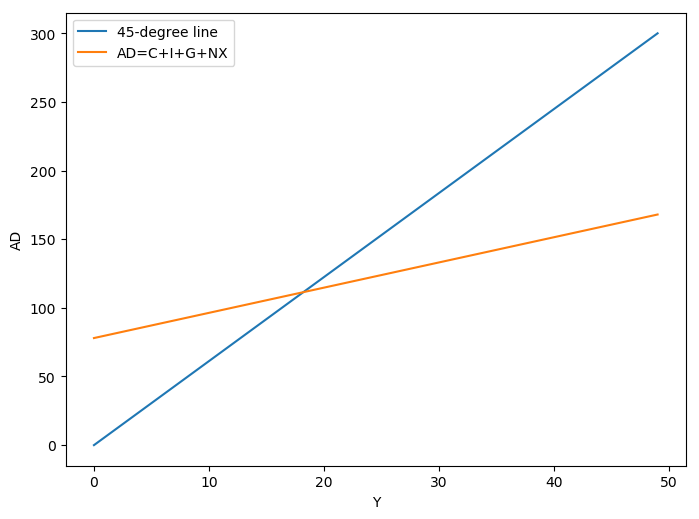

In [22]:
# We plot the 45-degree line of AD=Y and the AD=C+I+G+NX with the following parameters:
T = 40
I = 20
G = 30
NX = 10
a = 30
b = 0.3

cross = chx.keynesian_cross(T, I, G, NX, a, b)
equalibrium = chx.cross_equalibrium(T, I, G, NX, a, b)

print(f'The equalibrium for the Keynesian cross is: Y = {equalibrium:.1f}')
print(f'The equalibrium for the Keynesian cross is: Y = {eq_func(T, I, G, NX, a, b):.1f}')

Instead solved with linear algebra:

We have 3 equations of 3 unknown, all other variables are decided exogenously:

$$ AD = C + I + \bar{G} + NX $$
$$ C = a + b (Y-\bar{T})$$
$$ Y = AD $$

We rename $I + G + NX$ = $EE$, exogenous expenditure.

We rewrite the equations:

$$ - C + AD    = EE $$
$$ C - bY      = a -bT $$
$$ AD - Y      = 0 $$

This gives us the :

\\[
\begin{eqnarray*}
Ax = k \Leftrightarrow
\begin{bmatrix} 
-1 & 1 & 0 \\ 
1 & 0 & -b \\
0 & 1 & -1
\end{bmatrix} \cdot
\begin{bmatrix} 
C \\ 
AD \\
Y
\end{bmatrix} \,=\,
\begin{bmatrix} 
EE \\ 
a - bT \\
0
\end{bmatrix} 
\end{eqnarray*}
\\]



In [35]:
EE = I + G + NX
print(f'EE = {EE}')


A = np.array([[-1, 1, 0], [1, 0, -b], [0, 1, -1]])
print(f'A = {A}')
k = np.array([EE, a-b*T, 0])
print(f'k = {k}')

x1 = linalg.solve(A, k)
print(f'[ C AD Y ] ={x1}')



EE = 60
A = [[-1.   1.   0. ]
 [ 1.   0.  -0.3]
 [ 0.   1.  -1. ]]
k = [60. 18.  0.]
[ C AD Y ] =[ 51.42857143 111.42857143 111.42857143]


#### Theory of the Keynesian cross:

The models equalibrium is found where the two models cross, $Y^*$. They will always cross since $0<b<1$. If the production is higher than the aggregate expenditure and demand, the production stock will start to increase. This will make the producers correct their production level. This lower production leads to lower consumption, which again lowers demand. The production will continue to be lowered untill total production equals demand.

The new equalibrium for the Keynesian cross is: Y = 140.0
Change in production when delta_NX=20: delta_Y = 28.6


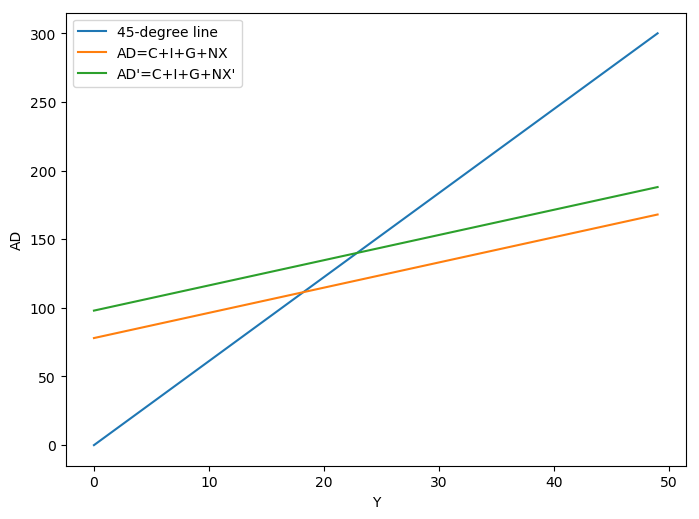

In [8]:
# We examine what happens when the net export increases:
delta_NX = 20
new_NX = NX + delta_NX

NX_shift = chx.keynesian_cross_NXshift(T, I, G, NX, a, b, delta_NX)

delta_Y = eq_func(T, I, G, new_NX, a, b) - eq_func(T, I, G, NX, a, b)

print(f'The new equalibrium for the Keynesian cross is: Y = {eq_func(T, I, G, new_NX, a, b):.1f}')
print(f'Change in production when delta_NX=20: delta_Y = {delta_Y:.1f}')



Because of the parameter b, the new equalibrium production is even greater than the increase in NX. 28.6 > 20.

### Extension

Instead of a lump sum tax we make, taxes depend on the production size:

$$ T = k + t Y $$

In [9]:
# We repeat the steps from the first part of the analysis:
Y, AD, a, b, k, t, I, G, NX = sm.symbols('Y, AD, a, b, k, t, I, G, NX')

eq_AD_t = sm.Eq(Y, a + b*(Y-(k + t*Y)) + I + G + NX)
eq_t = sm.solve(eq_AD_t, Y)[0]
yeq_t = sm.factor(eq_t)

print('Y=')
yeq_t

Y=


(G + I + NX + a - b*k)/(b*t - b + 1)

In [10]:
# We differentiate:
diff_Y_t = sm.diff(yeq_t, NX)
diff_Y_t

1/(b*t - b + 1)

We can see that the new slope is less steep. The multiplicator effect is smaller.

In [11]:
print(f'{diff_Y_t} < {diff_Y}')

1/(b*t - b + 1) < -1/(b - 1)


In [12]:
# We make it into a python function:
eq_func_t = sm.lambdify((k, t, I, G, NX, a, b), yeq_t)

The equalibrium for the Keynesian cross is: Y = 110.5
The new equalibrium for the Keynesian cross is: Y = 136.8
Change in production when delta_NX = 20: delta_Y = 26.3


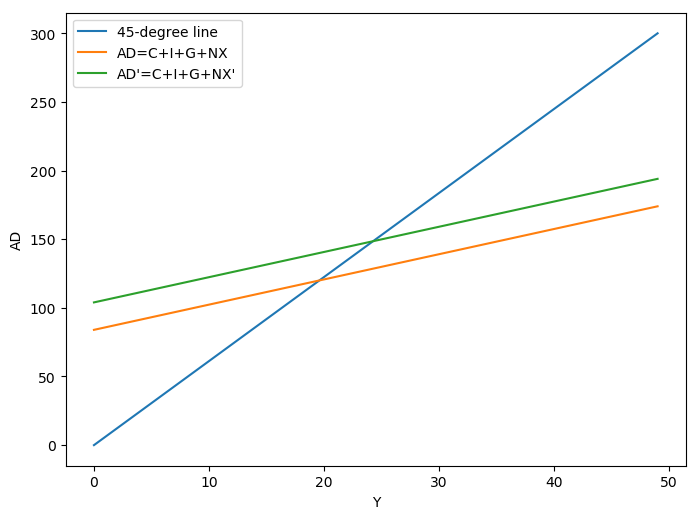

In [13]:
# We parameterize and plot the graphs:
k = 20
t = 0.2
I = 20
G = 30
NX = 10
a = 30
b = 0.3

delta_NX = 20
new_NX = NX + delta_NX

print(f'The equalibrium for the Keynesian cross is: Y = {eq_func_t(k, t, I, G, NX, a, b):.1f}')

NX_shift_t = chx.keynesian_cross_NXshift_t(k, t, I, G, NX, a, b, delta_NX)

delta_Y_t = eq_func_t(k, t, I, G, new_NX, a, b) - eq_func_t(k, t, I, G, NX, a, b)

print(f'The new equalibrium for the Keynesian cross is: Y = {eq_func_t(k, t, I, G, new_NX, a, b):.1f}')
print(f'Change in production when delta_NX = 20: delta_Y = {delta_Y_t:.1f}')

Because of the dependent tax the shift in the total production is smaller. 26.3 < 28.6. By including a production dependent tax the economy gets more stable and shifts in exogenous variables have a smaller effect on the economy.